# Análisis Exploratorio de Datos y Prueba de Hipótesis
Proyecto: Viajes en Taxi en Chicago (Noviembre 2017) - Iván de Jesús Díaz Navarro.

# Análisis de viajes en taxi y condiciones climáticas en Chicago (Noviembre 2017)

Este proyecto tiene como objetivo explorar y analizar los datos relacionados con los viajes en taxi en la ciudad de Chicago durante noviembre de 2017. Se trabaja con tres conjuntos de datos extraídos mediante SQL, que contienen información sobre el número de viajes por empresa, los barrios donde finalizaron dichos viajes, y las condiciones climáticas asociadas a ciertos trayectos.

Se realizan análisis exploratorios, visualizaciones gráficas y una prueba de hipótesis para evaluar si la duración de los viajes entre el Loop y el Aeropuerto Internacional O'Hare varía significativamente los sábados lluviosos.

> Este proyecto mezcla análisis de datos, visualización y estadística inferencial para generar conclusiones relevantes y aplicables.

## Objetivos

- Analizar la cantidad de viajes realizados por las distintas compañías de taxis el 15 y 16 de noviembre de 2017.
- Identificar los 10 barrios de Chicago con mayor promedio de viajes finalizados durante noviembre de 2017.
- Visualizar la distribución de viajes por empresa y por barrio usando gráficos claros e interpretables.
- Evaluar si la duración de los viajes desde el Loop al Aeropuerto O'Hare varía en función del clima (específicamente, los sábados lluviosos).
- Aplicar técnicas estadísticas para validar o refutar hipótesis con base en evidencia.




In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Configuración de estilo para gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)



> Estuve investigando sobre la configuración de los gráficos, me pareció una excelente opción.

## Paso 4: Análisis exploratorio de datos

> A diferencia de mis poryectos anteriores considero que poner un título y espacios por medio de un print hace mas legible el proyecto.

In [89]:
df_companies = pd.read_csv("moved_project_sql_result_01.csv")
df_neighborhoods = pd.read_csv("moved_project_sql_result_04.csv")

print("Datos de empresas de taxis:")
print(df_companies.head())
print(df_companies.info())
print()
print()
print("Datos de barrios:")
print(df_neighborhoods.head())
print(df_neighborhoods.info())

Datos de empresas de taxis:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


Datos de barrios:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns

In [83]:
df_companies["trips_amount"] = pd.to_numeric(df_companies["trips_amount"], errors='coerce')
df_neighborhoods["average_trips"] = pd.to_numeric(df_neighborhoods["average_trips"], errors='coerce')

> En esta parte del proyecto decidí asegurarme que los datos fueran correctos, procedi a ver si trips_amount y average_trips son numéricos y procedí a cambiar los formatos.

In [69]:
# Top 10 barrios por promedio de viajes
top10_neighborhoods = df_neighborhoods.sort_values(by="average_trips", ascending=False).head(10)
print(top10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


/var/folders/xk/dd3d30ws6s92dmt2_1xtdqnr0000gn/T/ipykernel_5542/1466331192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_companies.sort_values(by="trips_amount", ascending=False), x="company_name", y="trips_amount", palette="colorblind")


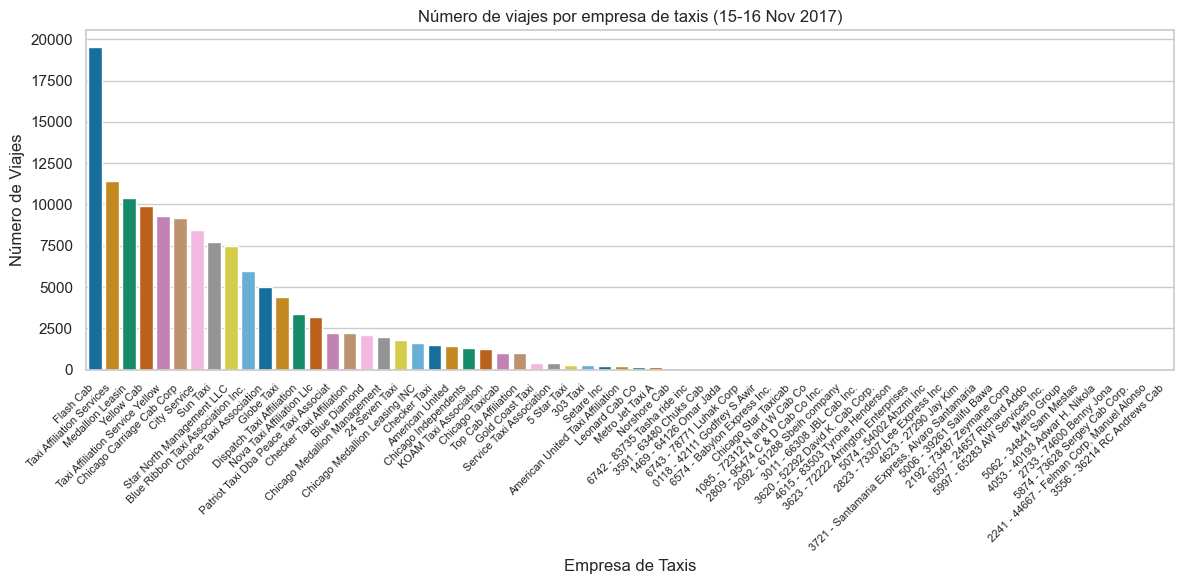

In [71]:
# Gráfico: Empresas de taxis
plt.figure(figsize=(12, 6))
sns.barplot(data=df_companies.sort_values(by="trips_amount", ascending=False), x="company_name", y="trips_amount", palette="colorblind")
plt.title("Número de viajes por empresa de taxis (15-16 Nov 2017)")
plt.xlabel("Empresa de Taxis")
plt.ylabel("Número de Viajes")
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

> Con este gráfico puedo apreciar de manera rápida el top 10 de compañias que tienen mas servicios.
>
> Observamos diferencias marcadas entre empresas de taxis. Algunas dominan el mercado, por lo que se puede sugerir la posibilidad de proponer estrategias de expansión o alianzas.

/var/folders/xk/dd3d30ws6s92dmt2_1xtdqnr0000gn/T/ipykernel_5542/1958624743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_neighborhoods, x="dropoff_location_name", y="average_trips", palette="magma")


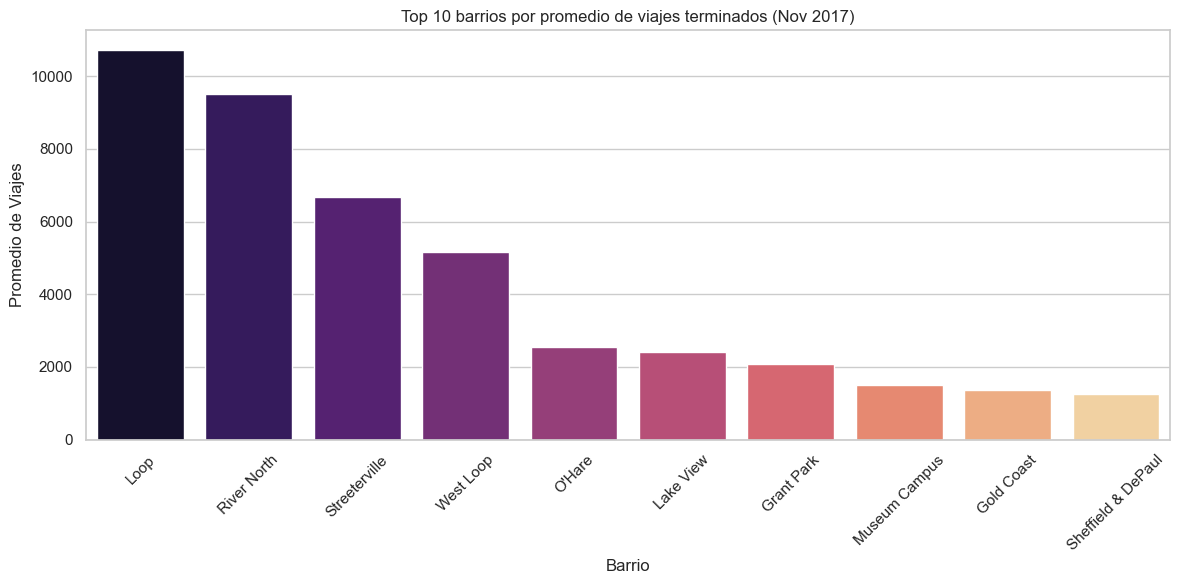

In [73]:
# Gráfico: Top 10 barrios
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_neighborhoods, x="dropoff_location_name", y="average_trips", palette="magma")
plt.title("Top 10 barrios por promedio de viajes terminados (Nov 2017)")
plt.xlabel("Barrio")
plt.ylabel("Promedio de Viajes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Con este gráfico puedo apreciar de manera rápida el top 10 de barrios que tienen mas servicios.
>
> Los 10 barrios principales concentran la mayor demanda de viajes, esto sugiere zonas de alta actividad económica o residencial. Sería estratégico enfocar recursos (autos, conductores) en estos barrios durante horas pico.

## Paso 5: Prueba de hipótesis

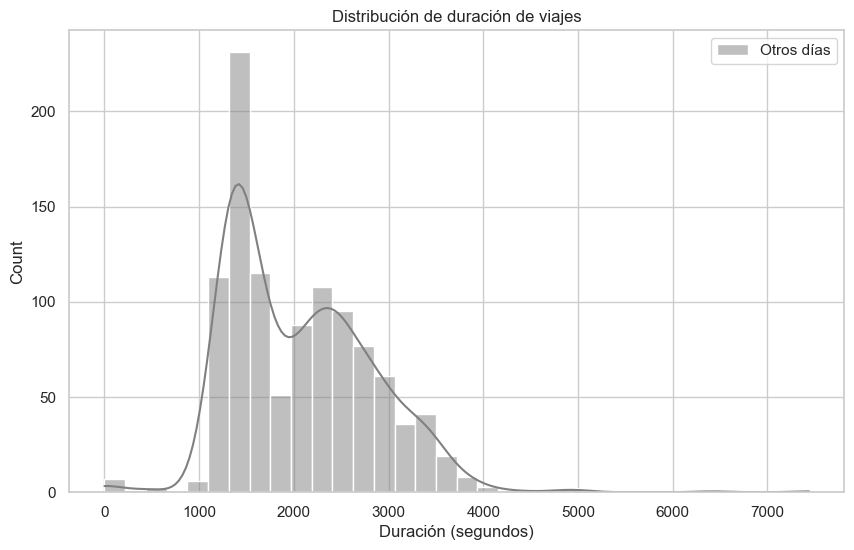

Estadístico de prueba: nan
P-valor: nan
No rechazamos H0: No hay evidencia significativa de cambio en duración.


In [102]:
# Generación de formatos adecuados para el gráfico.
df_trips = pd.read_csv("moved_project_sql_result_07.csv")
df_trips["start_ts"] = pd.to_datetime(df_trips["start_ts"])
df_trips["day_of_week"] = df_trips["start_ts"].dt.dayofweek
df_trips["is_rainy"] = df_trips["weather_conditions"].str.contains("Rain", case=False, na=False)
df_trips["is_saturday"] = df_trips["day_of_week"] == 5
df_trips["is_rainy_saturday"] = df_trips["is_rainy"] & df_trips["is_saturday"]

# Separar muestras
rainy_saturdays = df_trips[df_trips["is_rainy_saturday"]]["duration_seconds"]
other_trips = df_trips[~df_trips["is_rainy_saturday"]]["duration_seconds"]

# Histograma
plt.figure(figsize=(10,6))
sns.histplot(rainy_saturdays, color='blue', label='Sábados lluviosos', kde=True)
sns.histplot(other_trips, color='gray', label='Otros días', kde=True)
plt.title("Distribución de duración de viajes")
plt.xlabel("Duración (segundos)")
plt.legend()
plt.show()

# Prueba de hipótesis
alpha = 0.05
stat, p_value = stats.ttest_ind(rainy_saturdays, other_trips, equal_var=False, nan_policy='omit')
print(f"Estadístico de prueba: {stat:.2f}")
print(f"P-valor: {p_value:.4f}")

if p_value < alpha:
    print("Rechazamos H0: Hay evidencia de diferencia en duración promedio.")
else:
    print("No rechazamos H0: No hay evidencia significativa de cambio en duración.")

> Usé la prueba t de Student (independiente, varianzas desiguales) debido a que estamos comparando dos mdeias de muestras independientes, así no se asumen igualdad de varianzas.
>
> El resultado de la prueba nos da una idea sobre la relación entre el clima lluvioso en sábado y la duración de los viajes. Si encontramos diferencia significativa, podría justificar ajustes operativos (por ejemplo, prever más tiempo de traslado,
alertar a conductores y pasajeros).